In [1]:
import numpy as np
import matplotlib as mpl
from oscopetools.LSN_analysis import LSN_analysis
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In /home/kailun/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/kailun/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/kailun/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/kailun/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/kailun/.local/lib/python3.6/site-packages/matplotlib/mpl-data/s

In [2]:
mpl.rcParams['figure.figsize'] = [15,10]
mpl.rcParams['font.size'] = 20
mpl.rcParams['figure.titlesize'] = 'x-large'
mpl.rcParams['axes.titlesize'] = 'medium'
mpl.rcParams['axes.labelsize'] = 'small'
mpl.rcParams['legend.fontsize'] = 'xx-small'
mpl.rcParams['xtick.labelsize'] = 'xx-small'
mpl.rcParams['ytick.labelsize'] = 'xx-small'

## To initialize the analysis

In [3]:
# The path to the data file.
datafile_path = '/home/kailun/Desktop/PhD/other_projects/surround_suppression_neural_code/Multiplex/Center_Surround_976474801_data.h5'
# The path to the LSN stimulus npy file.
LSN_stim_path = '/home/kailun/Desktop/PhD/other_projects/surround_suppression_neural_code/openscope_surround-master/stimulus/sparse_noise_8x14.npy'
num_baseline_frames = 3   # int or None. The number of baseline frames before the start and after the end of a trial.
use_dff_z_score = False   # True or False. If True, the cell responses will be converted to z-score before analysis.

LSN_data = LSN_analysis(datafile_path, LSN_stim_path, num_baseline_frames, use_dff_z_score)

## To get an overview of the data.

In [4]:
print(LSN_data)

Analyzing file: /home/kailun/Desktop/PhD/other_projects/surround_suppression_neural_code/Multiplex/Center_Surround_976474801_data.h5
ON LSN stimulus value: 255
OFF LSN stimulus value: 0
Background LSN value: 127
LSN stimulus size: 10 degree
Number of cells: 240
Use DF/F z-score: False
Use corrected LSN: False
Use only valid eye positions: False
Use only positive fluorescence responses: False


## Different conditions for computing ON-OFF responses and RFs

- Other variables (RFs, ON/OFF responses, etc.) will be automatically updated.
- The RF arrays for RF plotting will also be automatically updated with default RF parameters:
    - threshold = 0
    - window_start = None (the start frame of the stimulus will be used)
    - window_len = None (the stimulus trial length in frames will be used)

In [ ]:
# If True, the LSN stimulus corrected by eye positions will be used. 
# Otherwise, the original LSN stimulus will be used.
correct_LSN = True
LSN_data.correct_LSN_by_eye_pos(correct_LSN)

In [ ]:
# If True, only stimuli with valid eye positions are used. Otherwise, all stimuli will be used.
use_only_valid_eye_pos = True
LSN_data.use_valid_eye_pos(use_only_valid_eye_pos)

In [ ]:
# If True, the fluorescence responses less than 0 will be set to 0 when computing the avg_responses.
use_only_positive_responses = True
LSN_data.use_positive_fluo(use_only_positive_responses)

## RF plotting

### Plotting parameters

- The RFs are computed during initialization with default parameters. 
- The threshold and integration window for RFs can be changed.
- To compute the RFs by using different thresholds (default = 0) and different integration windows by adjusting:
    - window_start:
        The start of the window in frame. If there are baseline frames, then index $0$ to $n-1$ are the first $n$ baseline frames. The stimulus starts at the $n$th frame.
    - window_len: 
        The length of the integration window in frames. If None, the stimulus trial length in frames will be used.

In [5]:
threshold = 0.   # int or float, range = [0, 1]. The threshold for the RF, anything below the threshold will be set to 0.
window_start = 5   # int or None. The start index (within a trial) of the integration window for computing the RFs.
window_len = 7   # int or None. The length of the integration window in frames for computing the RFs.
LSN_data.get_RFs(threshold, window_start, window_len)

### To plot the trial-averaged responses within pixels (all pixels of the LSN stimulus) for a cell.

- To visualize the integration window of the RF (blue) relative to the stimulus (gray).
- Each line plot is the average ON or OFF response of the selected cell on a square pixel of the LSN stimulus.
- Other keyword arguments can be added for plt.plot().

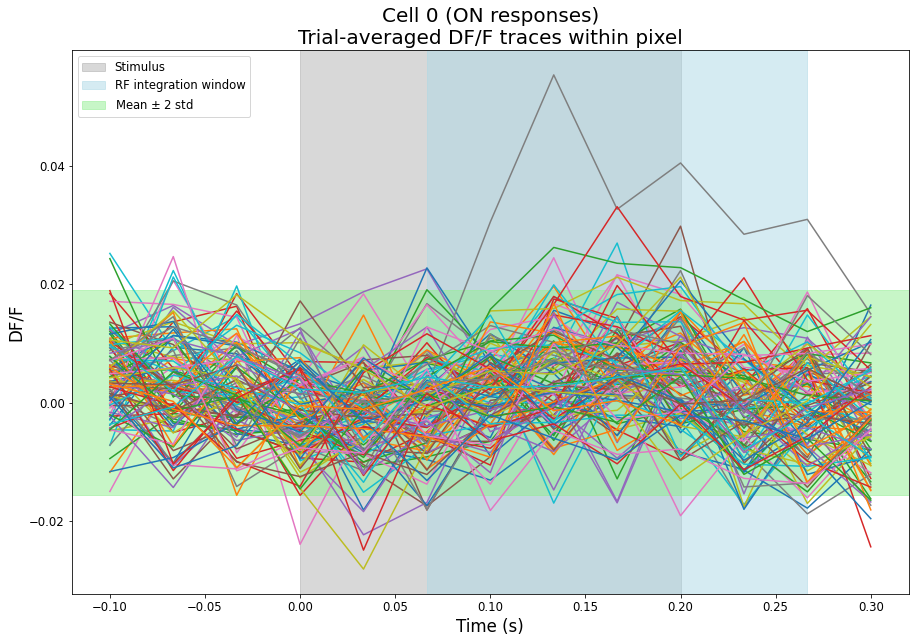

In [6]:
polarity = 'ON'   # 'ON' or 'OFF'. The polarity of the responses to be plotted.
cell_idx = 0   # The cell index to be plotted.
num_std = 2   # int or float. Number of standard deviation from mean for plotting the horizontal span.
ax = LSN_data.plot_pixel_avg_dff_traces(polarity, cell_idx, num_std)

### To plot the RFs

- To plot the RF of selected cells using the integration window set above.
- Choose the polarity (ON, OFF, or both) to be plotted.

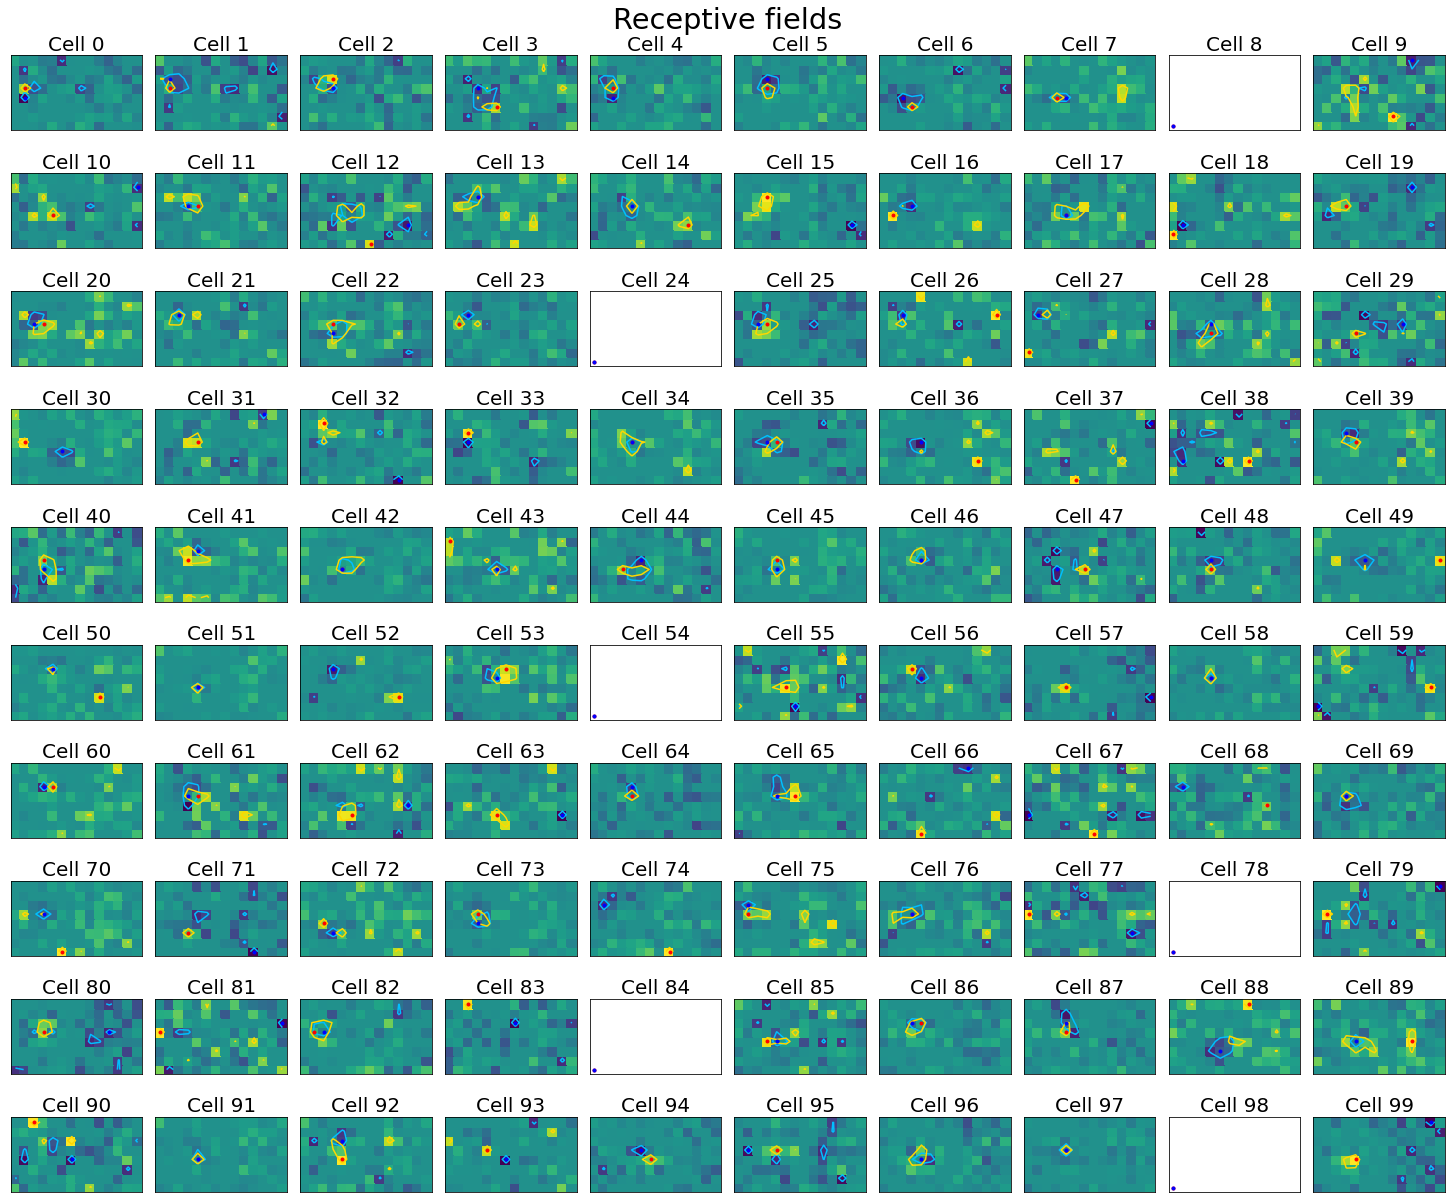

In [7]:
fig_title = "Receptive fields"   # The title of the figure.
cell_idx_lst = np.arange(100)   # list or np.array. The cell numbers to be plotted.
polarity = 'both'   # 'ON', 'OFF', or 'both'. The polarity of the RFs to be plotted.
num_cols = 10   # int. The number of columns of the subplots.
label_peak = True   # bool. If True, the pixel with max response will be labeled. The ON peaks are labeled with red dots and OFF peaks with blue dots.
contour_levels = [0.6]   # list or array-like. The contour levels to be plotted. Examples: [], [0.5], [0.6, 0.8].
fig = LSN_data.plot_RFs(fig_title, cell_idx_lst, polarity, num_cols, label_peak, contour_levels)